In [1]:
!pip install scikit-image

In [2]:
!pip install imutils

In [3]:
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
#first upload the input images directly to the colab NB and make sure it is in png form or change the extension in following 2 lines accordingly
imageA = cv2.imread('/content/input1.png')
imageB = cv2.imread('/content/input2.png')
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [5]:
def plot_images(x,y,s):
  plt.figure(figsize=(15,20))
  plt.subplot(1,2,1)
  plt.title(s[0])
  plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
  plt.subplot(1,2,2)
  plt.title(s[1])
  plt.imshow(cv2.cvtColor(y, cv2.COLOR_BGR2RGB))

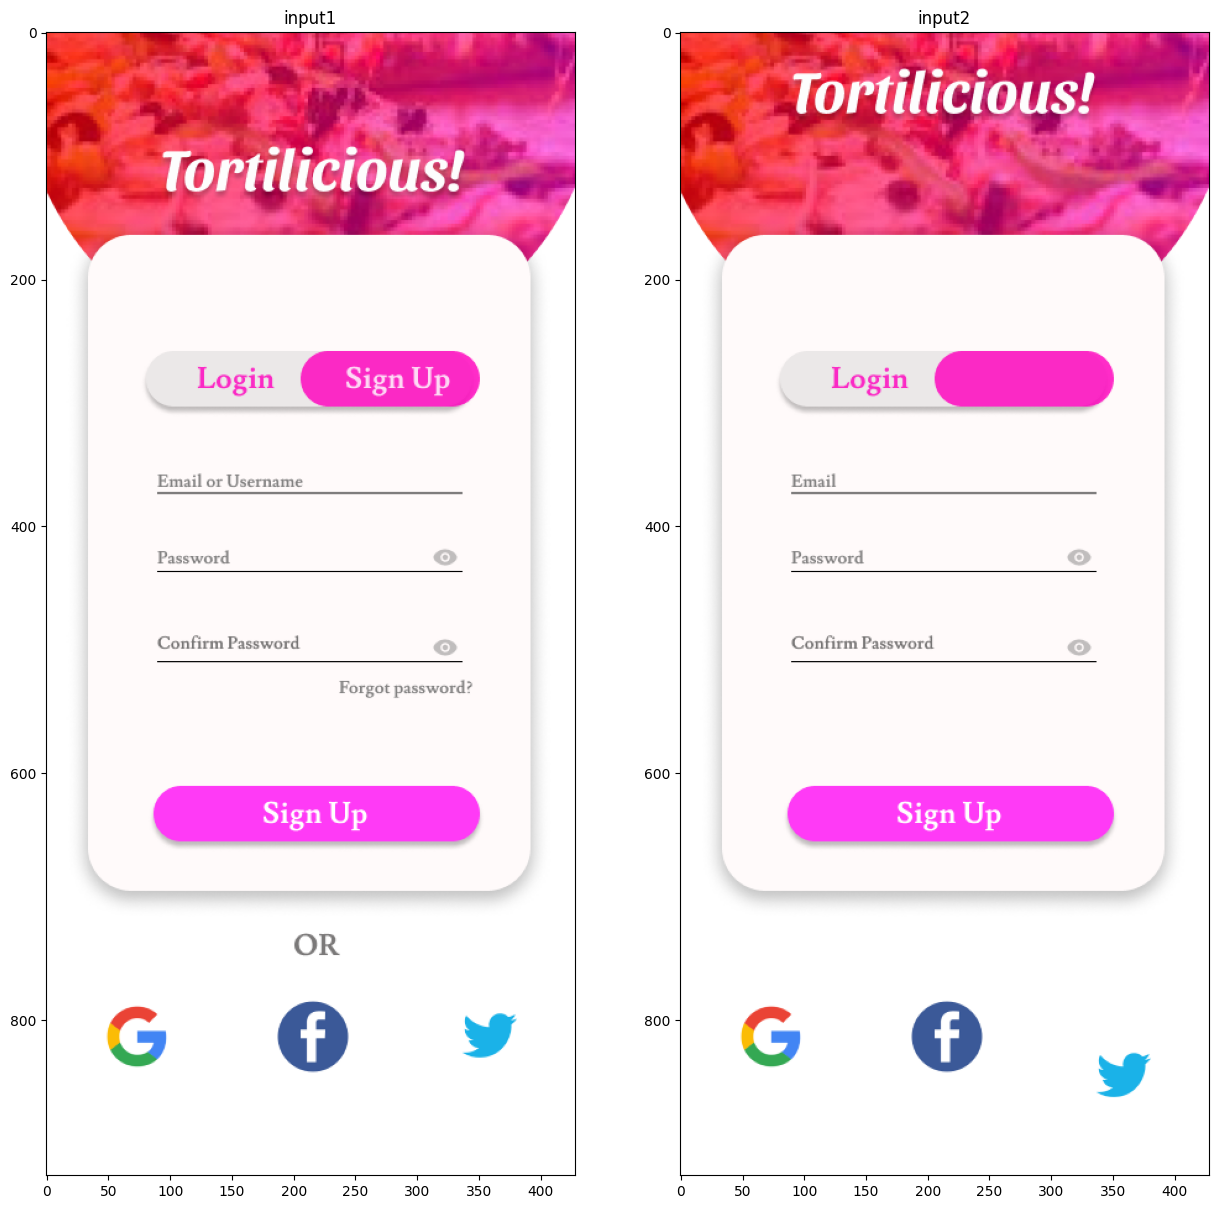

In [6]:
st=["input1", "input2"]
plot_images(imageA,imageB,st)

In [7]:
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9388101913918601


In [10]:
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


-1

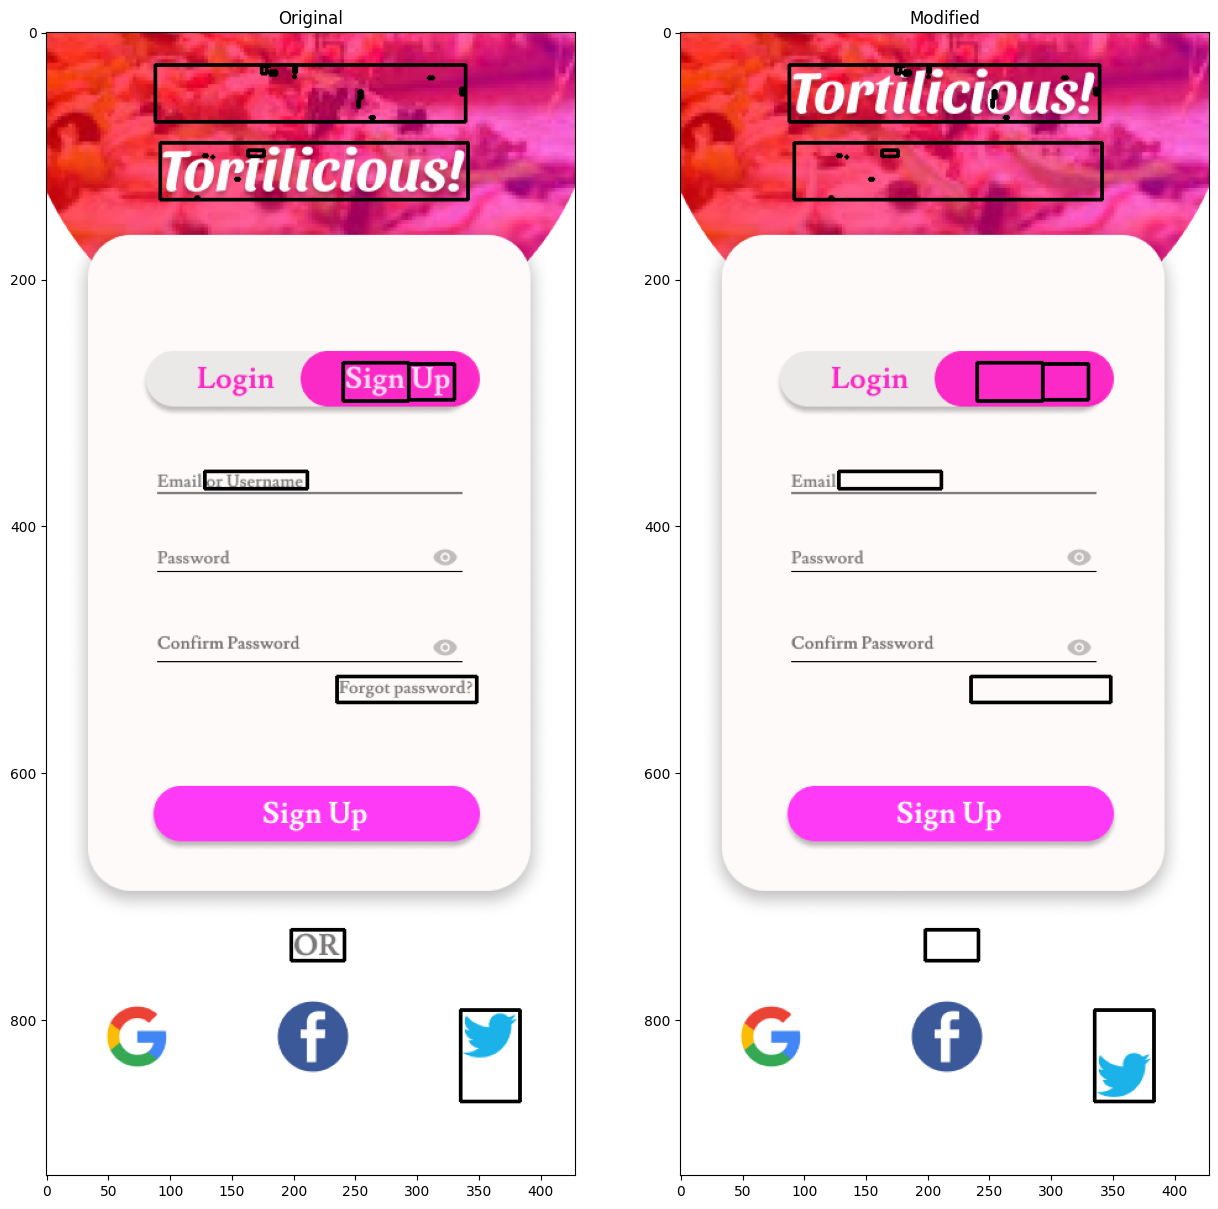

In [11]:
for c in cnts:
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 0), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 0), 2)
s=["Original","Modified"]
plot_images(imageA,imageB,s)
cv2.waitKey(0)